In [51]:
import numpy as np
import pandas as pd
import datetime as dt
import calendar
#import pycountry_convert as pc
#import pycountry as pctry
import yfinance as yf
%matplotlib inline

import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact

import plotly.graph_objects as go

In [52]:
##** Read the data first time and save it to a file.**
import yfinance as yf
tickersY = yf.Tickers('VTSAX IYZ XLB XLY XLP XLE IYF XLV XLI XLK IYR XLU IBB ITA SOXX ITB')
df_hist=tickersY.history(start='2000-01-01', end='2020-06-04')
sector_df=df_hist['Close']
sector_df.columns=(['Total Stock Market','Communications', 'Materials', 'Consumer Discretionary', 'Consumer Staples',
                   'Energy', 'Financials', 'Health Care', 'Industrial', 'Technology', 'Real Estate',
                   'Utilities', 'BioTech', 'Defense', 'Semiconductor', 'Home Construction'])
#sector_df.to_csv("yfinance_sector_data.csv")

[*********************100%***********************]  16 of 16 completed


# Std dev - all sectors 

In [53]:
#sector_df=pd.read_csv("yfinance_sector_data.csv",  infer_datetime_format=True)

In [54]:
sector_df.set_index("Date",inplace=True)

KeyError: 'Date'

In [55]:
sector_df.head(3)

,Total Stock Market,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction
Date,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.283916,16.885973,19.811380,43.262833,14.231282,13.261072,22.506960,23.411850
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.127146,16.568123,19.264048,41.067986,13.830540,12.861057,21.996243,22.707548
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.793398,17.005169,19.178183,40.458302,14.074896,13.185598,21.798914,22.428253


In [56]:
sector_df_stddev=sector_df.pct_change()
sector_df_stddev.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-26',
               '2020-05-27', '2020-05-28', '2020-05-29', '2020-06-01',
               '2020-06-02', '2020-06-03'],
              dtype='datetime64[ns]', name='Date', length=5137, freq=None)

In [57]:
#calculate std dev yearly
std_dev_yearly= sector_df_stddev.rolling(window=30).std().groupby(sector_df_stddev.index.year).mean()
std_dev_yearly.head(3)

,Total Stock Market,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction
Date,,,,,,,,,,,,,,,,
2000,NaN,NaN,NaN,0.015983,0.006987,0.017680,NaN,0.017946,0.018934,0.017711,0.014967,0.025875,0.015036,0.014087,0.015104,0.019822
2001,0.027720,NaN,NaN,0.014445,0.007472,0.018082,0.037792,0.013953,0.017292,0.016399,0.016317,0.029569,0.011789,0.012283,0.015232,0.018274
2002,0.027284,NaN,NaN,0.017121,0.008588,0.024141,0.037163,0.014908,0.017343,0.017365,0.017294,0.025997,0.011878,0.018297,0.015152,0.017318


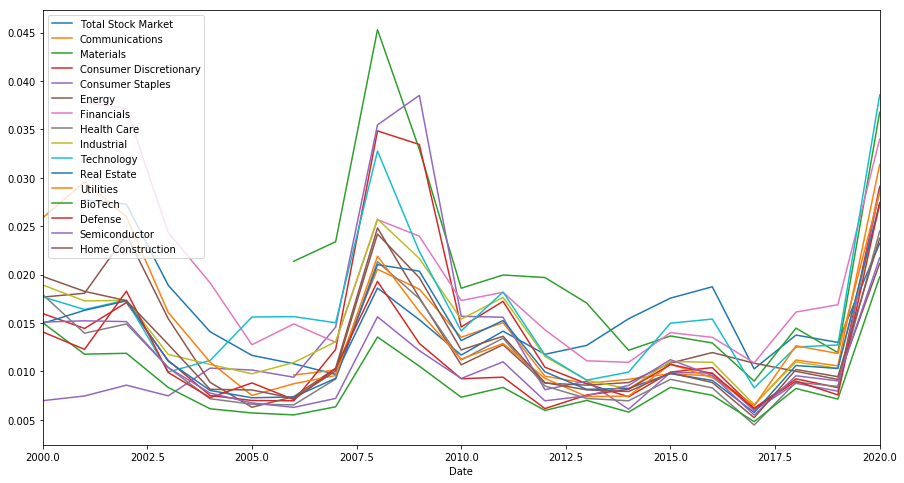

In [58]:
std_dev_yearly.plot(figsize=(15,8))

# Std dev - sectors categorised into Defensive/Aggressive amd Total market

In [59]:
# slice the dataframes
df_Total_Stock_Market=std_dev_yearly[['Total Stock Market']]
df_cat_defensive=std_dev_yearly[['Health Care','Consumer Staples','Utilities','Defense','Home Construction']]
df_cat_aggressive=std_dev_yearly[['Communications','Materials','Financials','Technology','BioTech','Semiconductor','Materials','Energy','Industrial']]

# calculate average of defensive and aggressive for plotting and add it as new column
df_cat_defensive['average'] = df_cat_defensive.mean(numeric_only=True, axis=1)
df_cat_aggressive['average'] = df_cat_aggressive.mean(numeric_only=True, axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [60]:
df_Total_Stock_Market.head(2)

,Total Stock Market
Date,
2000,NaN
2001,0.02772


In [61]:
df_cat_defensive.head(2)

,Health Care,Consumer Staples,Utilities,Defense,Home Construction,average
Date,,,,,,
2000,0.017946,0.006987,0.025875,0.014087,0.019822,0.016943
2001,0.013953,0.007472,0.029569,0.012283,0.018274,0.016310


In [62]:
df_cat_aggressive.head(2)

,Communications,Materials,Financials,Technology,BioTech,Semiconductor,Materials,Energy,Industrial,average
Date,,,,,,,,,,
2000,NaN,NaN,NaN,0.017711,0.015036,0.015104,NaN,0.017680,0.018934,0.016893
2001,NaN,NaN,0.037792,0.016399,0.011789,0.015232,NaN,0.018082,0.017292,0.019431


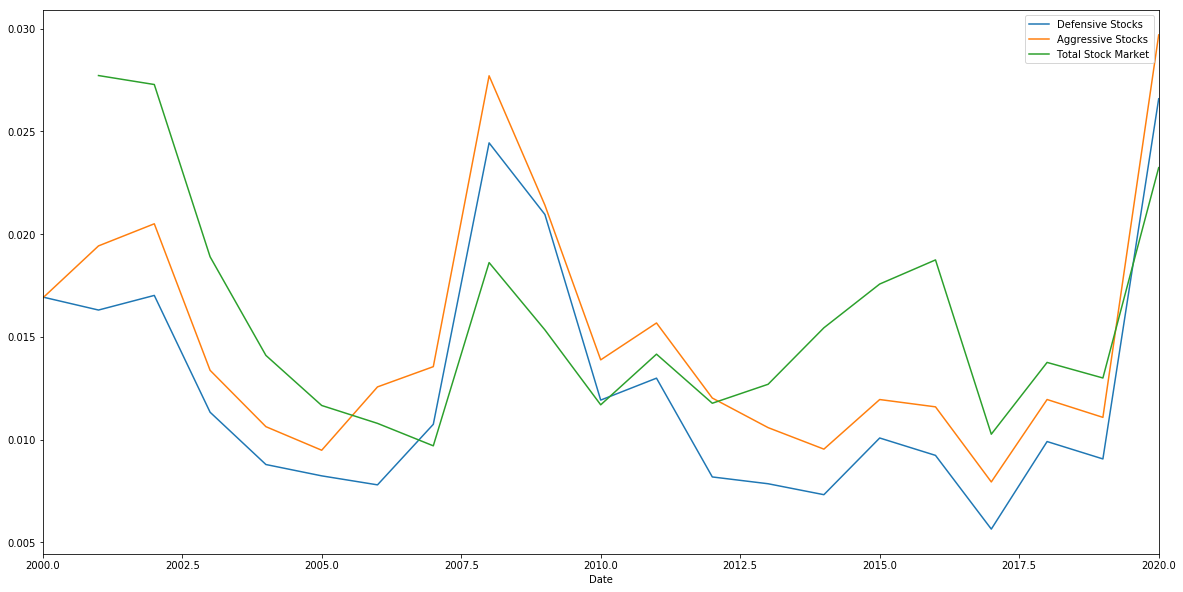

In [63]:
# *** Plot the graph

# Set figure for defensive stocks
ax = df_cat_defensive[['average']].plot(figsize=(20,10))

# Overlay aggressive stocks
df_cat_aggressive[['average']].plot(ax=ax)
df_Total_Stock_Market.plot(ax=ax)
# Set the legend of the figure
ax.legend(["Defensive Stocks", "Aggressive Stocks","Total Stock Market"]);

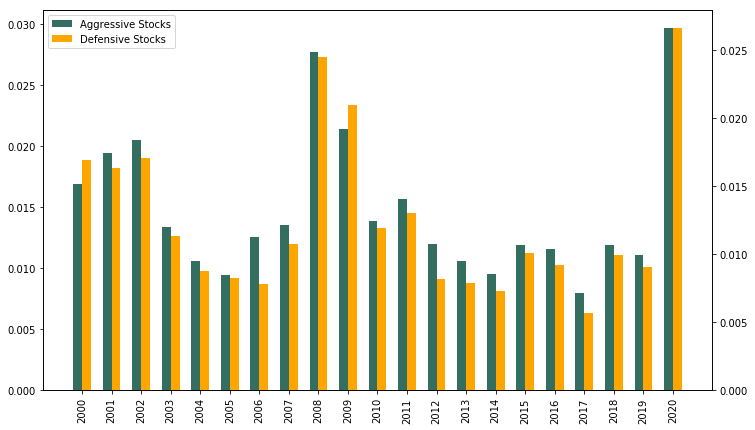

In [64]:
# *** plot bar chart for defensive and aggressive

#ax1 = plt.subplot(1,1,1)
f, ax1 = plt.subplots(figsize=(12,7))
w = 0.3
#plt.xticks(), will label the bars on x axis with the respective country names.

plt.xticks(df_cat_aggressive.index+w/2, df_cat_aggressive.index, rotation='vertical')
aggr =ax1.bar(df_cat_aggressive.index, df_cat_aggressive['average'], width=w, color="#346e60", align='center', )
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()
#We have calculated GDP by dividing gdpPerCapita to population.
defs =ax2.bar(df_cat_defensive.index+w, df_cat_defensive['average'], width=w,color="orange",align='center',)
#Set the Y axis label as GDP.
#plt.ylabel('Aggressive')
#To set the legend on the plot we have used plt.legend()
plt.legend([aggr, defs],['Aggressive Stocks', 'Defensive Stocks'])
#To show the plot finally we have used plt.show().

plt.show()


In [65]:
df_cat_aggressive['average']

Date
2000    0.016893
2001    0.019431
2002    0.020507
2003    0.013377
2004    0.010635
2005    0.009488
2006    0.012570
2007    0.013555
2008    0.027709
2009    0.021415
2010    0.013886
2011    0.015681
2012    0.012029
2013    0.010589
2014    0.009542
2015    0.011955
2016    0.011600
2017    0.007946
2018    0.011957
2019    0.011088
2020    0.029698
Name: average, dtype: float64

In [66]:
df_cat_defensive['average']

Date
2000    0.016943
2001    0.016310
2002    0.017022
2003    0.011338
2004    0.008793
2005    0.008242
2006    0.007804
2007    0.010750
2008    0.024444
2009    0.020960
2010    0.011928
2011    0.012995
2012    0.008189
2013    0.007858
2014    0.007325
2015    0.010084
2016    0.009238
2017    0.005651
2018    0.009911
2019    0.009065
2020    0.026591
Name: average, dtype: float64

## calculating scaled value outside pyhton.. will write a function in python later in the notebook.
### need it to plot disaster and jumps data on the same chart

In [67]:
dfjumps_by_year = pd.read_csv("jumps_by_year.csv")
dfjumps_by_year.head(2)

,Date,Total Stock Market,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction,Unnamed: 17,ScaledVal
0,2000,0,0,0,20,0,24,0,5,45,43,24,87,22,25,26,44,NaN,0.000000
1,2001,78,0,0,24,2,32,60,12,32,28,20,79,12,10,21,32,NaN,0.025161


In [68]:
dfjumps_by_year=dfjumps_by_year[['Date','ScaledVal']]
dfjumps_by_year.set_index('Date', inplace=True)
dfjumps_by_year.head(3)

,ScaledVal
Date,
2000,0.000000
2001,0.025161
2002,0.030000


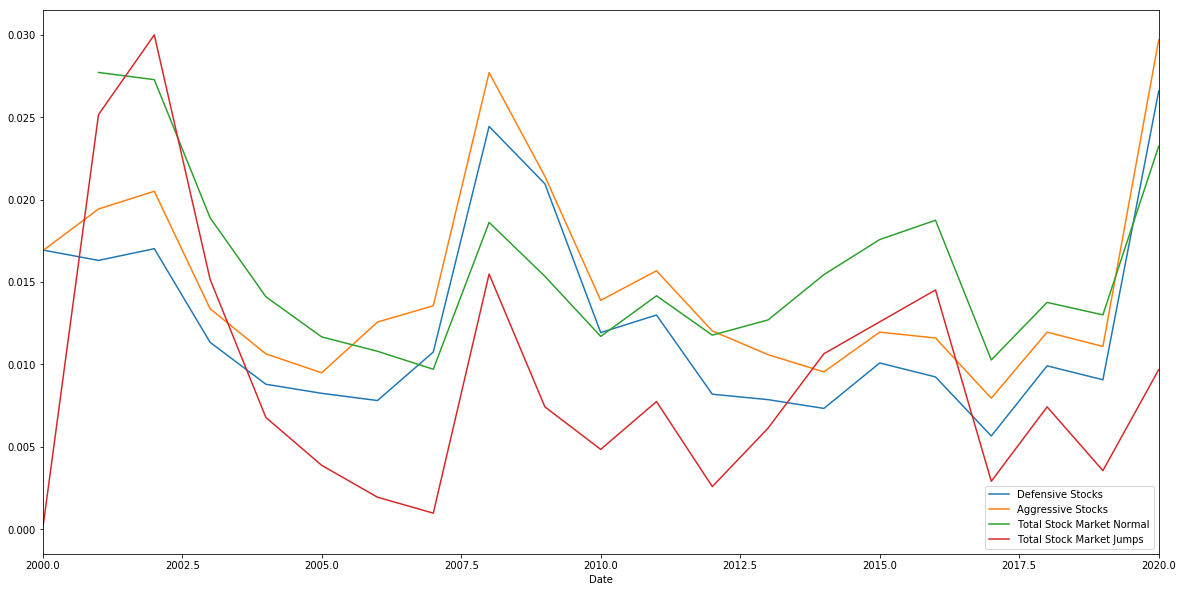

In [69]:
ax = df_cat_defensive[['average']].plot(figsize=(20,10))

# Overlay aggressive stocks
df_cat_aggressive[['average']].plot(ax=ax)
df_Total_Stock_Market.plot(ax=ax)
dfjumps_by_year.plot(ax=ax)
# Set the legend of the figure
ax.legend(["Defensive Stocks", "Aggressive Stocks","Total Stock Market Normal","Total Stock Market Jumps"]);

In [70]:
def scaler(seq, rng):
    ba=rng[1]-rng[0]
    s2=[]
    for x in seq:
        mini=min(seq)
        maxi=max(seq)
        y=ba*((x-mini)/(maxi-mini))
        s2.append(y)
    return pd.DataFrame(s2, seq.index )

In [71]:
df_usa_deaths_affected = pd.read_csv("P1_df_usa_deaths_affected.csv")
df_usa_deaths_affected.columns=['Date', 'Total Deaths', 'No Affected']

In [72]:
df_usa_deaths_affected.set_index("Date", inplace=True)
df_usa_deaths_affected.head(3)

,Total Deaths,No Affected
Date,,
2000,162,81264
2001,153,128833
2002,444,171053


In [73]:
df_usa_deaths_affected['Scaled Deaths']=scaler(df_usa_deaths_affected['Total Deaths'], [0,.03])
df_usa_deaths_affected['Scaled Affected']=scaler(df_usa_deaths_affected['No Affected'], [0,.03])

In [74]:
df_usa_deaths_affected.head(2)

,Total Deaths,No Affected,Scaled Deaths,Scaled Affected
Date,,,,
2000,162,81264,0.001375,0.000025
2001,153,128833,0.001233,0.000042


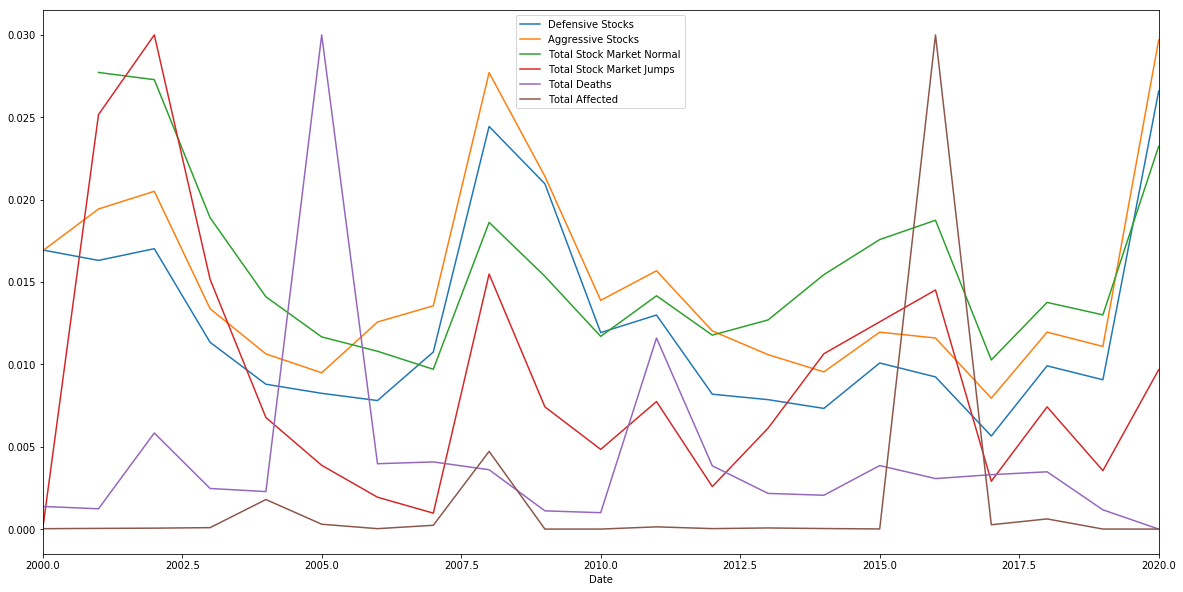

In [75]:
ax = df_cat_defensive[['average']].plot(figsize=(20,10))

# Overlay aggressive stocks
df_cat_aggressive[['average']].plot(ax=ax)
df_Total_Stock_Market.plot(ax=ax)
dfjumps_by_year.plot(ax=ax)
df_usa_deaths_affected['Scaled Deaths'].plot(ax=ax)
df_usa_deaths_affected['Scaled Affected'].plot(ax=ax)
# Set the legend of the figure
ax.legend(["Defensive Stocks", "Aggressive Stocks","Total Stock Market Normal","Total Stock Market Jumps","Total Deaths","Total Affected"]);

## Plot parallel coordinates chart

In [78]:
df_disasters_unscaled = pd.read_csv('df_disasters_unscaled.csv')
df_jumps_and_std_dev = pd.read_csv('jumps_and_std_dev.csv')
df_jumps_and_std_dev.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
df_jumps_and_std_dev["Date"]=df_jumps_and_std_dev["Date"] +2000
df_jumps_and_std_dev.set_index("Date", inplace=True)
df_jumps_and_std_dev.head(3)

,Average Std Dev,Total Stock Market
Date,,
2000,0.261497,0.0
2001,0.251723,78.0
2002,0.262706,93.0


In [79]:
df_disasters_unscaled.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
df_disasters_unscaled["Date"]=df_disasters_unscaled["Date"] +2000
df_disasters_unscaled.set_index("Date", inplace=True)
df_disasters_unscaled.head(3)

,Number of Disasters,Total Deaths,No Affected
Date,,,
2000,31,162.0,81264.0
2001,27,153.0,128833.0
2002,32,444.0,171053.0


In [80]:
combined_df=pd.concat([df_disasters_unscaled, df_jumps_and_std_dev], axis=1)
combined_df.head(4)

,Number of Disasters,Total Deaths,No Affected,Average Std Dev,Total Stock Market
Date,,,,,
2000,31,162.0,81264.0,0.261497,0.0
2001,27,153.0,128833.0,0.251723,78.0
2002,32,444.0,171053.0,0.262706,93.0
2003,23,231.0,258195.0,0.174980,47.0


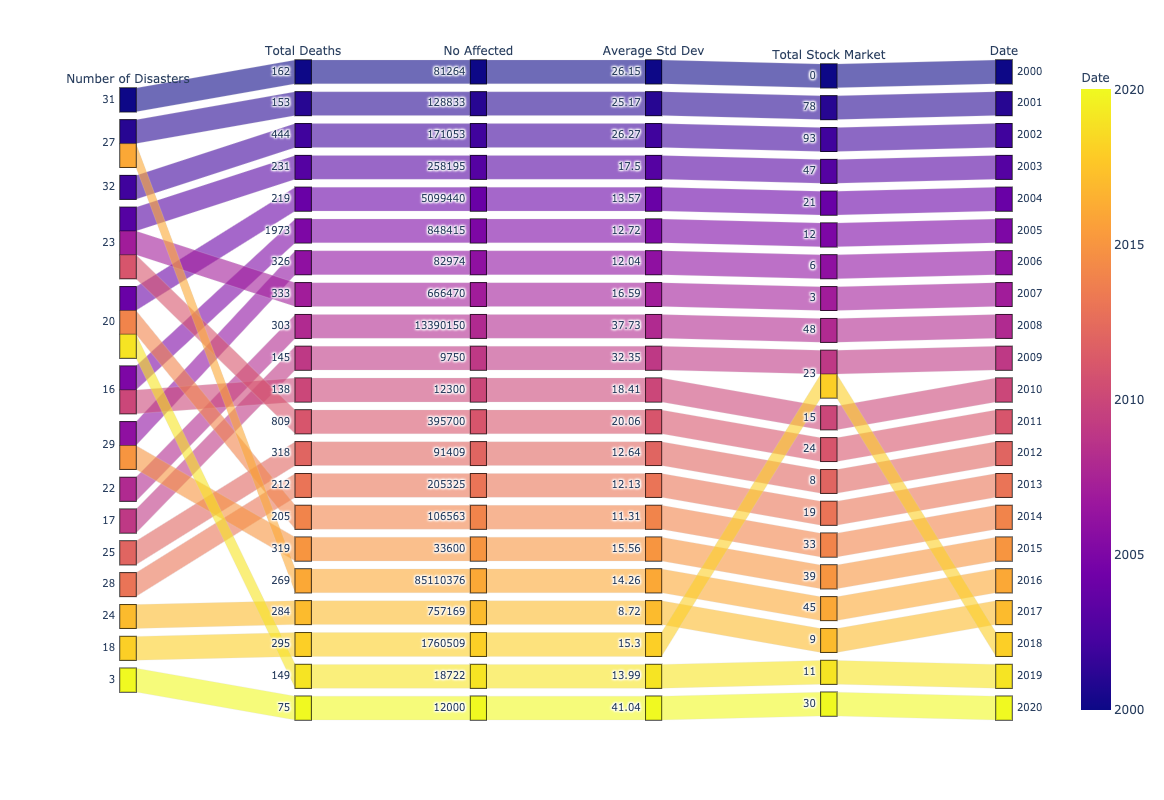

In [81]:
combined_df['Average Std Dev']=round(combined_df['Average Std Dev']*100,2)
combined_df=combined_df.sort_values("Date", ascending=True)
figi=px.parallel_categories(combined_df, height=800, color=combined_df.index)
figi.show()

## Plotting the aggressive and defensive charts on same scale
### *** chart seems to plot incorrectly on a couple years.. to troubleshoot

In [82]:
df_cat_aggressive.describe()["average"]

count    21.000000
mean      0.014836
std       0.005859
min       0.007946
25%       0.011088
50%       0.012570
75%       0.016893
max       0.029698
Name: average, dtype: float64

In [83]:
df_cat_defensive.describe()["average"]

count    21.000000
mean      0.012450
std       0.005810
min       0.005651
25%       0.008242
50%       0.010084
75%       0.016310
max       0.026591
Name: average, dtype: float64

In [84]:
df_cat_defensive['Scaled Average']=scaler(df_cat_defensive['average'], [0,1])
df_cat_aggressive['Scaled Average']=scaler(df_cat_aggressive['average'], [0,1])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [85]:
df_cat_defensive.describe()["Scaled Average"]

count    21.000000
mean      0.324657
std       0.277469
min       0.000000
25%       0.123695
50%       0.211688
75%       0.509024
max       1.000000
Name: Scaled Average, dtype: float64

In [86]:
df_cat_aggressive.describe()["Scaled Average"]

count    21.000000
mean      0.316753
std       0.269375
min       0.000000
25%       0.144466
50%       0.212596
75%       0.411341
max       1.000000
Name: Scaled Average, dtype: float64

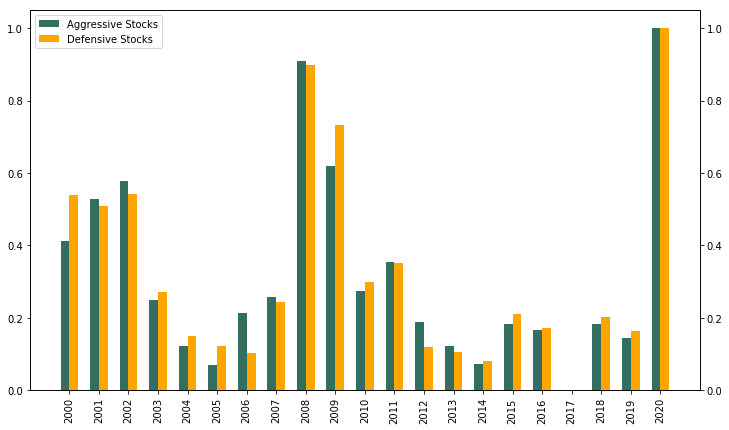

In [87]:
# *** plot bar chart for defensive and aggressive

#ax1 = plt.subplot(1,1,1)
f, ax1 = plt.subplots(figsize=(12,7))
w = 0.3
#plt.xticks(), will label the bars on x axis with the respective country names.

plt.xticks(df_cat_aggressive.index+w/2, df_cat_aggressive.index, rotation='vertical')
aggr =ax1.bar(df_cat_aggressive.index, df_cat_aggressive['Scaled Average'], width=w, color="#346e60", align='center', )
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()
#We have calculated GDP by dividing gdpPerCapita to population.
defs =ax2.bar(df_cat_defensive.index+w, df_cat_defensive['Scaled Average'], width=w,color="orange",align='center',)
#Set the Y axis label as GDP.
#plt.ylabel('Aggressive')
#To set the legend on the plot we have used plt.legend()
plt.legend([aggr, defs],['Aggressive Stocks', 'Defensive Stocks'])
#To show the plot finally we have used plt.show().

plt.show()


## Plot pie chart for all stock returns

In [88]:
df_total_rets_year=pd.read_csv("total_rets_year.csv",index_col="Date",  infer_datetime_format=True)
df_total_rets_year.head(3)

,Total Stock Market,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction
Date,,,,,,,,,,,,,,,,
2000,1.00000,1.0,1.0,0.977274,1.122664,0.706362,1.000000,0.974251,0.857417,1.268888,1.095412,0.564825,1.270944,1.255466,0.899595,0.857128
2001,0.87971,1.0,1.0,0.934739,1.083282,0.817570,0.915347,0.891005,1.021406,0.818670,0.894593,0.766467,0.900729,0.869948,0.991741,1.127301
2002,0.54201,1.0,1.0,0.861397,1.034476,0.614128,0.521504,0.790396,0.946715,0.853184,0.754270,0.618331,0.799059,0.712245,0.992611,0.813400


In [89]:
df_total_rets_year.describe()

,Total Stock Market,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1.094467,1.086835,1.046271,1.053442,1.102467,1.017240,1.125444,1.079869,1.083924,1.071136,1.082596,1.077117,1.078860,1.090156,1.083152,1.103221
std,0.240747,0.202902,0.310260,0.208671,0.189547,0.214322,0.348370,0.178469,0.208386,0.236058,0.199534,0.267384,0.131195,0.169698,0.136767,0.200806
min,0.542010,0.613545,0.421142,0.497123,0.601222,0.579761,0.482902,0.630139,0.559511,0.610447,0.612724,0.564825,0.799059,0.710898,0.766900,0.670288
25%,1.000000,1.000000,1.000000,0.906102,1.016165,0.914103,0.935115,0.974251,0.946715,0.853184,0.956766,0.996835,1.028419,1.010370,1.009983,1.015820
50%,1.101329,1.041388,1.000000,1.122209,1.089514,1.006803,1.052198,1.125545,1.134925,1.117415,1.134932,1.113946,1.111733,1.130657,1.068311,1.099028
75%,1.210759,1.202495,1.104213,1.187410,1.266911,1.186573,1.383441,1.172510,1.220855,1.262464,1.220312,1.178424,1.142777,1.208927,1.173719,1.235990
max,1.655403,1.569625,1.793436,1.339833,1.353495,1.325713,1.809530,1.335152,1.481580,1.401788,1.405487,1.513250,1.274340,1.287472,1.414092,1.427326


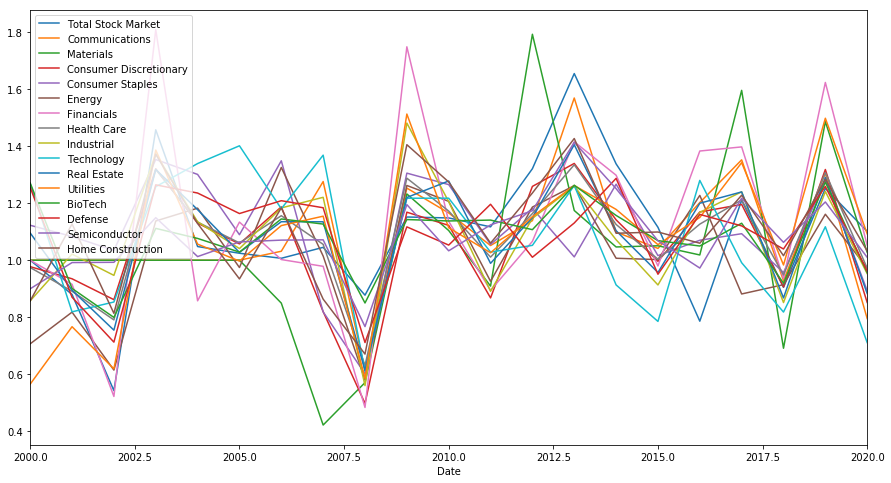

In [90]:
df_total_rets_year.plot(figsize=(15,8))

In [91]:
hvplot.plot(df_total_rets_year, kind="line", width=1000, height=600)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [92]:
df_total_rets_year_averages=df_total_rets_year.describe().loc[["mean"]]
df_total_rets_year_averages=df_total_rets_year_averages.T

In [93]:
df_total_rets_year_averages

,mean
Total Stock Market,1.094467
Communications,1.086835
Materials,1.046271
Consumer Discretionary,1.053442
Consumer Staples,1.102467
Energy,1.017240
Financials,1.125444
Health Care,1.079869
Industrial,1.083924
Technology,1.071136


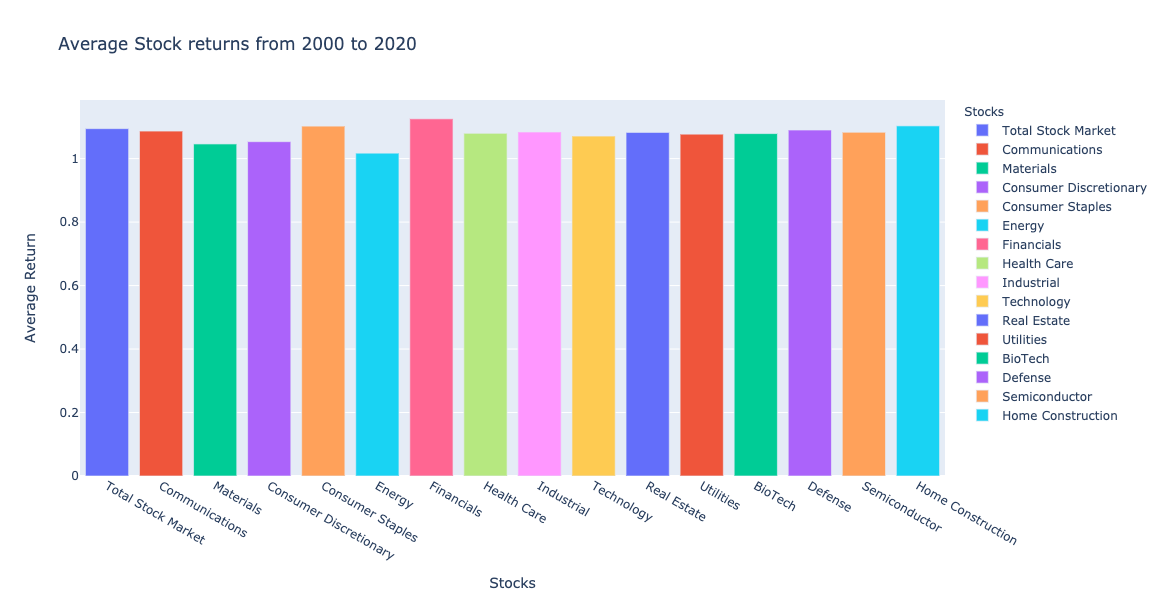

In [94]:
fig = px.bar(df_total_rets_year_averages, x=df_total_rets_year_averages.index, y='mean',
             color=df_total_rets_year_averages.index,
            
             labels={'mean':'Average Return', 'index':'Stocks'}, height=600, title="Average Stock returns from 2000 to 2020" )
fig.show()

In [95]:
df_total_rets_year_averages["mean"] = df_total_rets_year_averages["mean"]-1

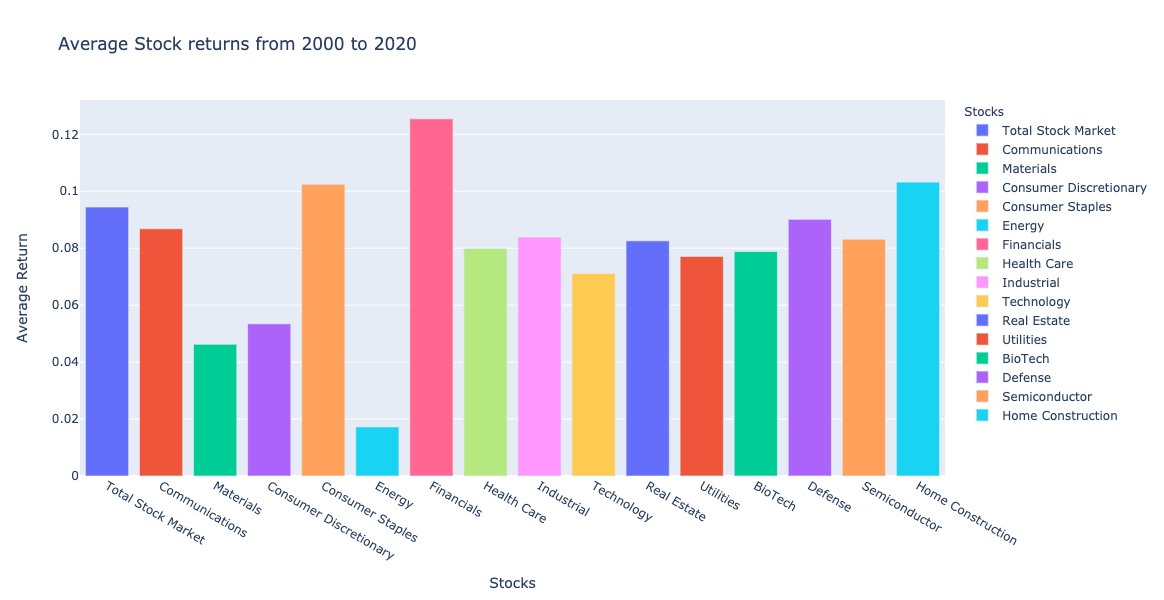

In [96]:
fig = px.bar(df_total_rets_year_averages, x=df_total_rets_year_averages.index, y='mean',
             color=df_total_rets_year_averages.index,
            
             labels={'mean':'Average Return', 'index':'Stocks'}, height=600, title="Average Stock returns from 2000 to 2020" )
fig.show()

# Plot disaster data

In [97]:
df_year_all_joined =  pd.read_csv('year_all_joined.csv')
df_month_all_joined =  pd.read_csv('month_all_joined.csv')

In [98]:
df_year_all_joined.columns=['Year', 'Total Stock Market', 'Communications', 'Materials',
       'Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials',
       'Health Care', 'Industrial', 'Technology', 'Real Estate', 'Utilities',
       'BioTech', 'Defense', 'Semiconductor', 'Home Construction',
       'Number of Disasters', 'Total Deaths', 'No Affected']
df_year_all_joined.set_index("Year", inplace=True)
df_year_all_joined.head(2)

,Total Stock Market,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction,Number of Disasters,Total Deaths,No Affected
Year,,,,,,,,,,,,,,,,,,,
2000,0.0,0.0,0.0,20.0,0.0,24.0,0.0,5.0,45.0,43.0,24.0,87.0,22.0,25.0,26.0,44.0,31,162.0,81264.0
2001,78.0,0.0,0.0,24.0,2.0,32.0,60.0,12.0,32.0,28.0,20.0,79.0,12.0,10.0,21.0,32.0,27,153.0,128833.0


In [99]:
df_month_all_joined.columns=['Year', 'Month', 'Total Stock Market', 'Communications',
       'Materials', 'Consumer Discretionary', 'Consumer Staples', 'Energy',
       'Financials', 'Health Care', 'Industrial', 'Technology', 'Real Estate',
       'Utilities', 'BioTech', 'Defense', 'Semiconductor', 'Home Construction',
       'Number of Disasters', 'Total Deaths', 'No Affected']

In [100]:
df_month_all_joined.set_index(["Year","Month"], inplace=True)

In [101]:
def plot_deaths():
    deaths= df_year_all_joined[["Total Deaths"]]
    std_y=deaths["Total Deaths"].std()
    min_y=deaths["Total Deaths"].min()-std_y
    max_y=deaths["Total Deaths"].max()+std_y
    ax = deaths["Total Deaths"].plot(kind="bar", title='Deaths-Natural disasters in USA (2000 - 2020)',color="#bf6270",figsize=(7,5))
    ax.set_xlabel("Year")
    ax.set_ylabel("No of deaths")
    plt.ylim(min_y,max_y)
    plt.show()
    return ax

def plot_affected():
    affected= df_year_all_joined[["No Affected"]]
    std_y=affected["No Affected"].std()
    min_y=affected["No Affected"].min()-std_y
    max_y=affected["No Affected"].max()+std_y
    ax = affected["No Affected"].plot(kind="bar", title='Affected-Natural disasters in USA (2000 - 2020)',color="orange",figsize=(7,5))
    ax.set_xlabel("Year")
    ax.set_ylabel("No of affected people")
    plt.ylim(min_y,max_y)
    plt.show()
    return ax

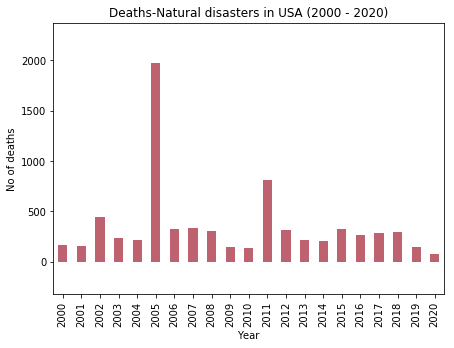

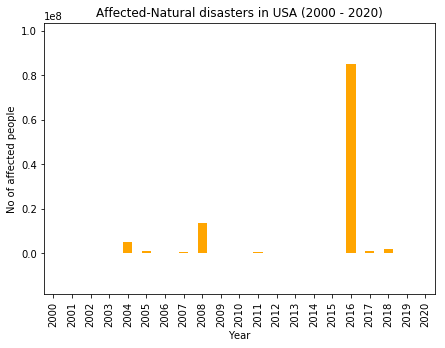

In [102]:
plot_deaths()
plot_affected()  

In [103]:
df_year_all_joined =  pd.read_csv('year_all_joined.csv')
df_year_all_joined.columns=['Year', 'Total Stock Market', 'Communications', 'Materials',
       'Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials',
       'Health Care', 'Industrial', 'Technology', 'Real Estate', 'Utilities',
       'BioTech', 'Defense', 'Semiconductor', 'Home Construction',
       'Number of Disasters', 'Total Deaths', 'No Affected']
df_year_all_joined.set_index("Year", inplace=True)
df_year_all_joined.head(2)

,Total Stock Market,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction,Number of Disasters,Total Deaths,No Affected
Year,,,,,,,,,,,,,,,,,,,
2000,0.0,0.0,0.0,20.0,0.0,24.0,0.0,5.0,45.0,43.0,24.0,87.0,22.0,25.0,26.0,44.0,31,162.0,81264.0
2001,78.0,0.0,0.0,24.0,2.0,32.0,60.0,12.0,32.0,28.0,20.0,79.0,12.0,10.0,21.0,32.0,27,153.0,128833.0


In [104]:
df_sector_jumps_totals_sliced= df_year_all_joined[['Total Stock Market', 'Communications', 'Materials',
       'Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials',
       'Health Care', 'Industrial', 'Technology', 'Real Estate', 'Utilities',
       'BioTech', 'Defense', 'Semiconductor', 'Home Construction']]
df_sector_jumps_totals_sliced.head(4)

,Total Stock Market,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction
Year,,,,,,,,,,,,,,,,
2000,0.0,0.0,0.0,20.0,0.0,24.0,0.0,5.0,45.0,43.0,24.0,87.0,22.0,25.0,26.0,44.0
2001,78.0,0.0,0.0,24.0,2.0,32.0,60.0,12.0,32.0,28.0,20.0,79.0,12.0,10.0,21.0,32.0
2002,93.0,0.0,0.0,36.0,6.0,76.0,120.0,25.0,38.0,35.0,38.0,90.0,11.0,37.0,30.0,37.0
2003,47.0,0.0,0.0,12.0,0.0,24.0,70.0,6.0,8.0,6.0,10.0,26.0,4.0,6.0,7.0,16.0


In [105]:
df_sector_jumps_totals_sliced.reset_index(inplace=True)

In [106]:
#df_sector_jumps_totals
cols=range(len(df_sector_jumps_totals_sliced.columns))
rows=range(len(df_sector_jumps_totals_sliced.index))
data_list=[]
count=0
for i in rows:
    row=int(i)
    year= int(df_sector_jumps_totals_sliced.loc[row][0])
    sectors=[]
    jumps=[]
    for j in cols:
        col=int(j)
        sector=df_sector_jumps_totals_sliced.columns[col]
        jumpcount=int(df_sector_jumps_totals_sliced.loc[row][col])
        if col !=0:
            # prepare list of values to be entered as columns to df
            sectors.append(sector)
            jumps.append(jumpcount)
            data_list.append([year,sector,jumpcount])

In [107]:
df_sector_jumps_totals=pd.DataFrame(data_list)

In [108]:
df_sector_jumps_totals.columns=["year","sector","jumpcount"]
df_sector_jumps_totals.head(5)

,year,sector,jumpcount
0,2000,Total Stock Market,0
1,2000,Communications,0
2,2000,Materials,0
3,2000,Consumer Discretionary,20
4,2000,Consumer Staples,0


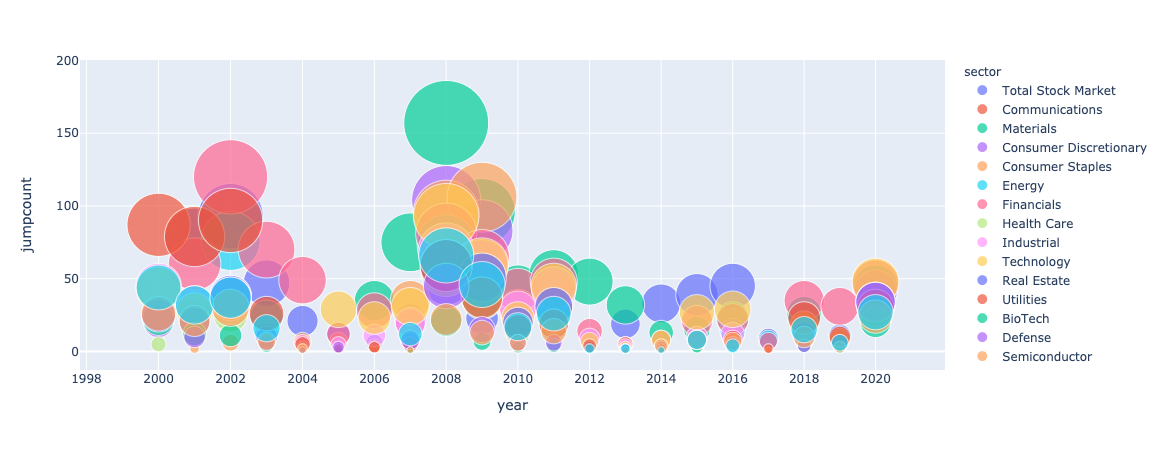

In [109]:
fig = px.scatter(df_sector_jumps_totals, x="year", y="jumpcount", size="jumpcount", color="sector",hover_name="sector", log_x=True, size_max=60)
fig.show()

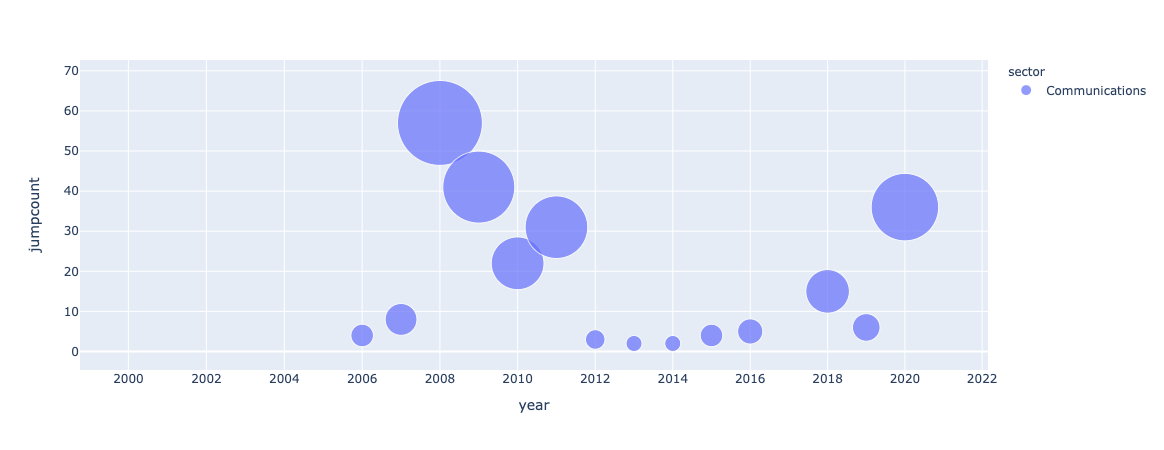

In [110]:
df_sector_jumps_totals_Communications= df_sector_jumps_totals[df_sector_jumps_totals.sector=='Communications']


fig = px.scatter(df_sector_jumps_totals_Communications, x="year", y="jumpcount", size="jumpcount", color="sector",hover_name="sector", log_x=True, size_max=60)
fig.show()

In [111]:
def plot_sector_jumps_totals_by_sector(sector):
    df_sector_jumps_totals_sector= df_sector_jumps_totals[df_sector_jumps_totals.sector==sector]
    fig = px.scatter(df_sector_jumps_totals_sector, x="year", y="jumpcount", size="jumpcount", color="sector",hover_name="sector", log_x=True, size_max=60)
    return fig

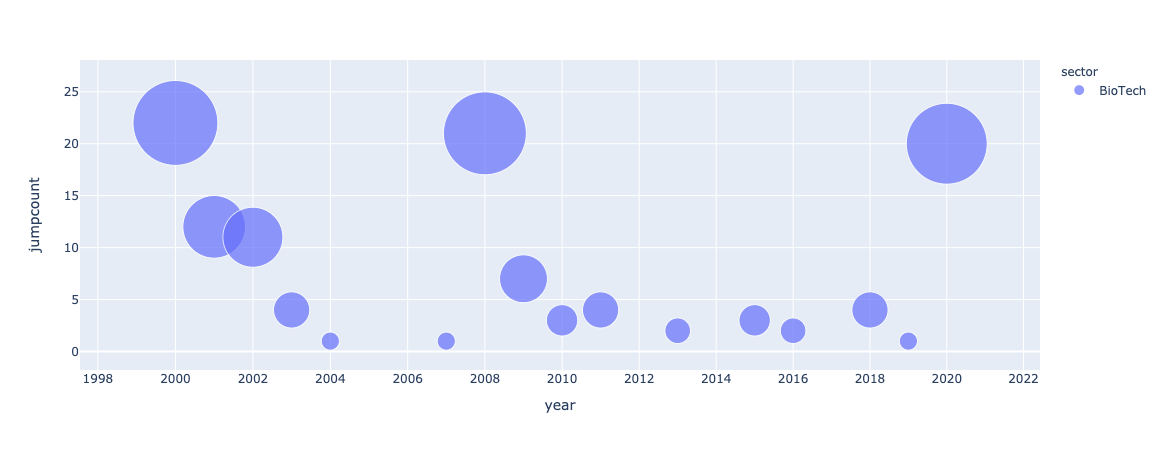

In [112]:
ax=plot_sector_jumps_totals_by_sector("BioTech")
ax.show()

In [113]:
interact(plot_sector_jumps_totals_by_sector, sector=df_sector_jumps_totals["sector"])


pn.extension('plotly')



Column
    [0] Column
        [0] Select(name='sector', options=['Total Stock Market', ...], value='Total Stock Market')
    [1] Row
        [0] Plotly(Figure, name='interactive04274')

## GDP and Cap data

In [114]:
df_gdp_cap_yearly=pd.read_csv("P1_usa_gdp_cap_data.csv",  infer_datetime_format=True)

In [115]:
df_gdp_cap_yearly.rename(columns={"Unnamed: 0":"year"}, inplace=True)
df_gdp_cap_yearly.set_index("year", inplace=True)                       


In [116]:
df_gdp_cap_yearly.head(2)

,cap,gdp
year,,
2000,36334.90878,1.025230e+13
2001,37133.24281,1.058180e+13


In [117]:
df_gdp_cap_yearly.describe()

,cap,gdp
count,20.000000,2.000000e+01
mean,49370.475802,1.526008e+13
std,8502.053162,3.319819e+12
min,36334.908780,1.025230e+13
25%,43514.261102,1.283088e+13
50%,48425.037115,1.485245e+13
75%,55491.423875,1.769610e+13
max,65112.000000,2.130000e+13


In [118]:
df_gdp_cap_yearly['Scaled gdp']=scaler(df_gdp_cap_yearly['gdp'], [36334.908780,65112.000])

In [119]:
df_gdp_cap_yearly.head(3)

,cap,gdp,Scaled gdp
year,,,
2000,36334.90878,1.025230e+13,0.000000
2001,37133.24281,1.058180e+13,858.282860
2002,38023.16111,1.093640e+13,1781.946297


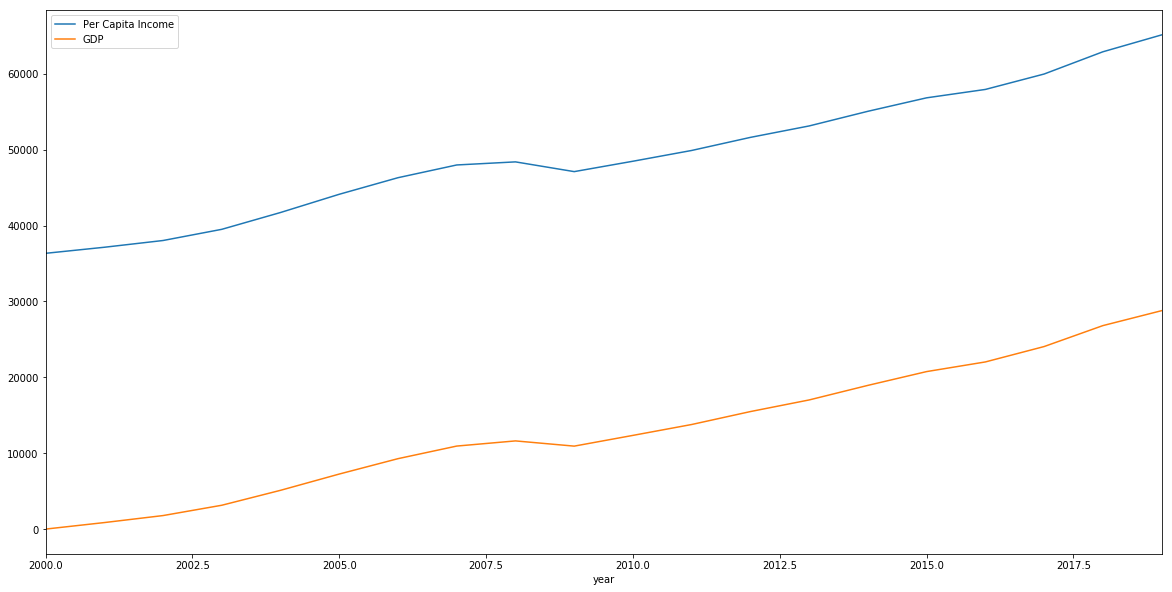

In [120]:
ax = df_gdp_cap_yearly[['cap']].plot(figsize=(20,10))

# Overlay aggressive stocks
df_gdp_cap_yearly[['Scaled gdp']].plot(ax=ax)

# Set the legend of the figure
ax.legend(["Per Capita Income", "GDP"]);

## Additional graphs


In [121]:
df_year=pd.read_csv("df_year_scaled.csv",  infer_datetime_format=True)
df_year.set_index("Year",inplace=True)
df_year.head(2)

,Total Stock Market,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,...,BioTech,Defense,Semiconductor,Home Construction,Number of Disasters,Total Deaths,No Affected,Scaled Disasters,Scaled Deaths,Scaled Affected
Year,,,,,,,,,,,,,,,,,,,,,
2000,0.0,0.0,0.0,20.0,0.0,24.0,0.0,5.0,45.0,43.0,...,22.0,25.0,26.0,44.0,31,162.0,81264.0,0.028966,0.001375,0.000025
2001,78.0,0.0,0.0,24.0,2.0,32.0,60.0,12.0,32.0,28.0,...,12.0,10.0,21.0,32.0,27,153.0,128833.0,0.024828,0.001233,0.000042


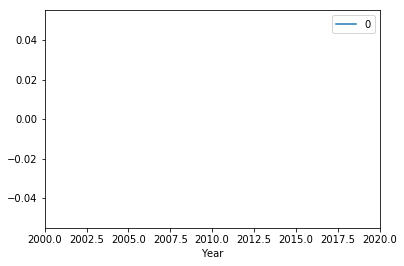

In [122]:
# Jason-
hline_def=df_year['Scaled Affected'].rolling(2).cov(df_cat_defensive['Scaled Average'])
hline_def_scaled=scaler(hline_def, [0,.03])
hline_agg=df_year['Scaled Affected'].rolling(2).cov(df_cat_aggressive['Scaled Average'])
hline_agg_scaled=scaler(hline_agg, [0,.03])
hline_rets=df_year['Scaled Affected'].rolling(2).cov(df_total_rets_year['Total Stock Market']-1)
hline_rets_scaled=scaler(hline_rets, [0,.03])
hline_def_scaled.plot()

In [123]:
hline_def

Year
2000             NaN
2001   -2.535741e-07
2002    2.528899e-07
2003   -4.169429e-06
2004   -1.036856e-04
2005    1.974621e-05
2006    2.820834e-06
2007    1.446972e-05
2008    1.466692e-03
2009    3.924330e-04
2010   -1.938577e-07
2011    3.443539e-06
2012    1.231155e-05
2013   -3.173429e-07
2014    4.426112e-07
2015   -1.694289e-06
2016   -6.058785e-04
2017    2.546706e-03
2018    3.597525e-05
2019    1.239683e-05
2020   -9.916546e-07
dtype: float64

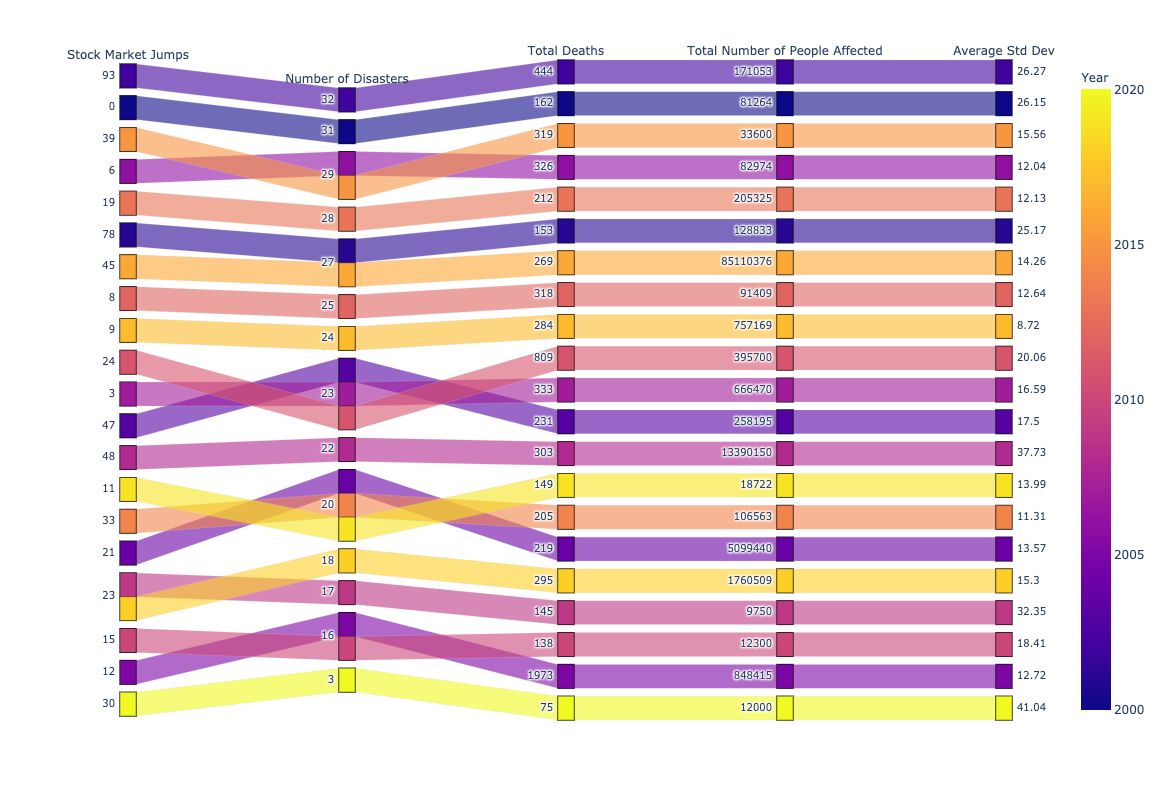

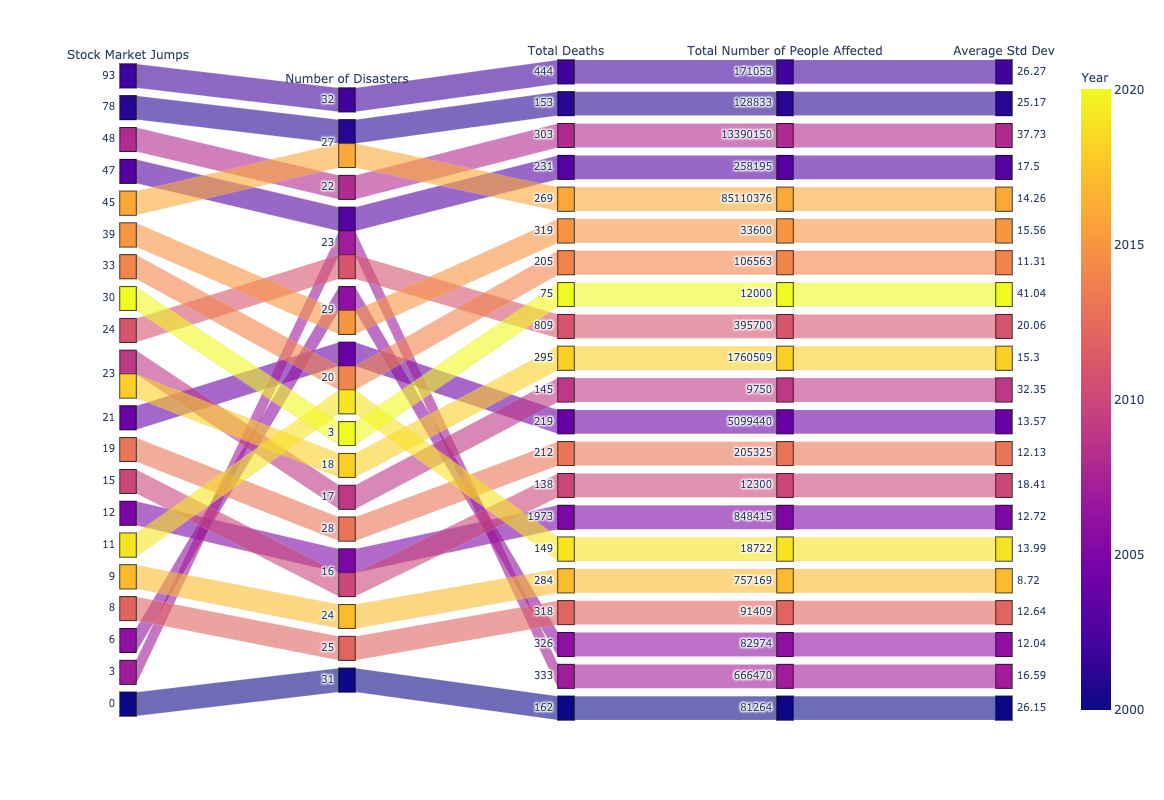

In [124]:
# Jason -Parallel plots From combined_df: Sorted by # of disasters
combined_df_disaster_sorted=combined_df.sort_values('Number of Disasters', ascending=False)
combined_df_disaster_sorted.index.name='Year'
figi_disaster=px.parallel_categories(combined_df_disaster_sorted.reset_index(), height=800, dimensions=combined_df_disaster_sorted[['Total Stock Market', 'Number of Disasters', 'Total Deaths', 'No Affected', 'Average Std Dev']], color='Year',
                               labels={'No Affected':'Total Number of People Affected', 'average2': 'Average Rolling Standard Deviation of Returns', 'Total Stock Market': 'Stock Market Jumps'})
figi_disaster.show()
#Combined_df sorted by # of jumps:
combined_df_jump_sorted=combined_df.sort_values('Total Stock Market', ascending=False)
combined_df_jump_sorted.index.name='Year'
figi_jump=px.parallel_categories(combined_df_jump_sorted.reset_index(), height=800, dimensions=combined_df_jump_sorted[['Total Stock Market', 'Number of Disasters', 'Total Deaths', 'No Affected', 'Average Std Dev']], color='Year',
                               labels={'No Affected':'Total Number of People Affected', 'average2': 'Average Rolling Standard Deviation of Returns', 'Total Stock Market': 'Stock Market Jumps'})
figi_jump.show()

In [125]:
combined_df.head()

,Number of Disasters,Total Deaths,No Affected,Average Std Dev,Total Stock Market
Date,,,,,
2000,31,162.0,81264.0,26.15,0.0
2001,27,153.0,128833.0,25.17,78.0
2002,32,444.0,171053.0,26.27,93.0
2003,23,231.0,258195.0,17.50,47.0
2004,20,219.0,5099440.0,13.57,21.0
